## MATH656 ASSIGNMENT1 

### Wine quality EDA analysis


This dataset comes from the UCI Machine Learning Repository. The full description is available at [UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality) as well as the data in csv format. 


* **Attribute information:**

   * **Input variables (based on physicochemical tests):**
   
   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
   * **Output variable (based on sensory data): **
   
   12 - quality (score between 0 and 10)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [4]:
red_data = pd.read_csv("E:/courses/2020 fall semester/math656/assignment/assignment1_0902/winequality-red.csv",sep = ";")
red_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
117,7.8,0.56,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4,6
625,6.8,0.69,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2,5
1391,8.0,0.64,0.22,2.4,0.094,5.0,33.0,0.99612,3.37,0.58,11.0,5
418,11.9,0.38,0.51,2.0,0.121,7.0,20.0,0.99960,3.24,0.76,10.4,6
635,8.7,0.84,0.00,1.4,0.065,24.0,33.0,0.99540,3.27,0.55,9.7,5


In [5]:
white_data = pd.read_csv("E:/courses/2020 fall semester/math656/assignment/assignment1_0902/winequality-white.csv",sep = ";")
white_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
94,7.50,0.17,0.32,1.70,0.040,51.0,148.0,0.99160,3.21,0.44,11.5,7
1797,6.90,0.25,0.27,9.05,0.039,37.0,128.0,0.99360,3.27,0.34,11.3,8
2624,6.15,0.21,0.37,3.20,0.021,20.0,80.0,0.99076,3.39,0.47,12.0,5
2783,7.10,0.20,0.31,7.40,0.053,32.0,211.0,0.99587,3.31,0.59,10.4,6
1836,7.00,0.19,0.23,5.70,0.123,27.0,104.0,0.99540,3.04,0.54,9.4,6


**Merge red wine data and white wine data as wine data.**

* label 1 for the class white wine

* label 0 for the class red wine

In [6]:
class1 = pd.DataFrame({"label":np.repeat(1,len(white_data))})
data1 = pd.concat([white_data,class1],axis =1)

In [7]:
class0 = pd.DataFrame({"label":np.repeat(0,len(red_data))})
data0 = pd.concat([red_data,class0],axis =1)

In [8]:
wine_data = data1.append(data0)
wine_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
3156,6.1,0.170,0.42,15.1,0.033,28.0,124.0,0.99684,2.87,0.47,9.5,5,1
1232,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5,0
99,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6,0
4175,6.9,0.350,0.39,2.4,0.048,25.0,157.0,0.99133,3.20,0.54,11.1,7,1
649,7.1,0.260,0.34,14.4,0.067,35.0,189.0,0.99860,3.07,0.53,9.1,7,1


In [9]:
#sns.heatmap(wine_data.isnull(),yticklabels=False,cbar=False,cmap='Blues')
#no null data

###  Basic information about the data

In [10]:
red_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
white_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [13]:
red_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
white_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [15]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
label                   6497 non-null int32
dtypes: float64(11), int32(1), int64(1)
memory usage: 685.2 KB


### EDA analysis

Use graphs to explore the winequality data set.

**1. Histgram**

In [16]:
#red_data.hist(bins=20,figsize=(12,12),color='orange')

In [17]:
#white_data.hist(bins=20,figsize=(12,12),color='blue')

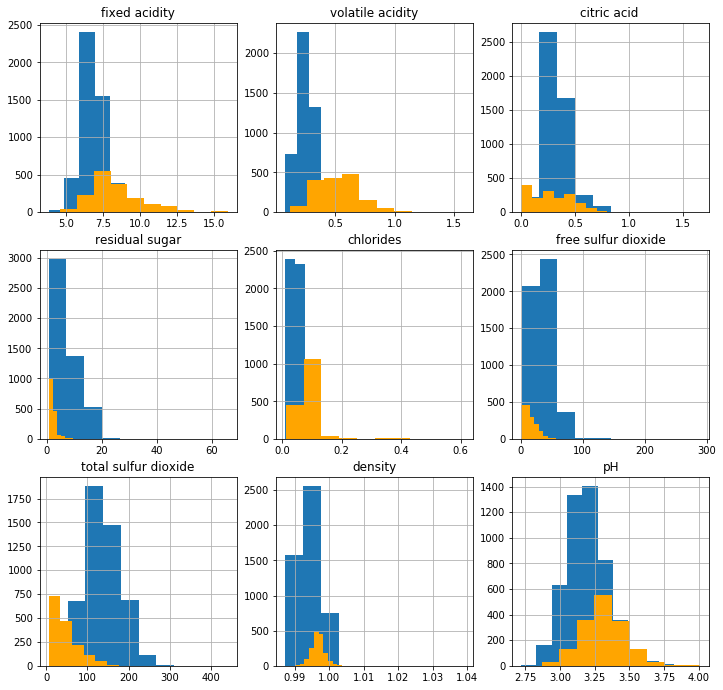

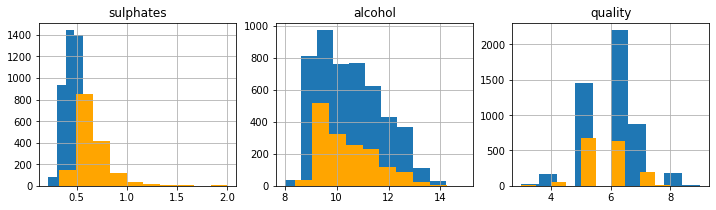

In [46]:
plt.figure(figsize = (12,16))

plt.subplot(431)
white_data["fixed acidity"].hist()
red_data["fixed acidity"].hist(color="orange")
plt.title('fixed acidity')

plt.subplot(432)
white_data["volatile acidity"].hist()
red_data["volatile acidity"].hist(color="orange")
plt.title('volatile acidity')

plt.subplot(433)
white_data["citric acid"].hist()
red_data["citric acid"].hist(color="orange")
plt.title('citric acid ')

plt.subplot(434)
white_data["residual sugar"].hist()
red_data["residual sugar"].hist(color="orange")
plt.title('residual sugar')

plt.subplot(435)
white_data["chlorides"].hist()
red_data["chlorides"].hist(color="orange")
plt.title('chlorides')

plt.subplot(436)
white_data["free sulfur dioxide"].hist()
red_data["free sulfur dioxide"].hist(color="orange")
plt.title('free sulfur dioxide')

plt.subplot(437)
white_data["total sulfur dioxide"].hist()
red_data["total sulfur dioxide"].hist(color="orange")
plt.title('total sulfur dioxide')

plt.subplot(438)
white_data["density"].hist()
red_data["density"].hist(color="orange")
plt.title('density')


plt.subplot(439)
white_data["pH"].hist()
red_data["pH"].hist(color="orange")
plt.title('pH')

#plt.figure(figsize = (4,12))
plt.figure(figsize = (12,3))
plt.subplot(131)
white_data["sulphates"].hist()
red_data["sulphates"].hist(color="orange")
plt.title('sulphates')

plt.subplot(132)
white_data["alcohol"].hist()
red_data["alcohol"].hist(color="orange")
plt.title('alcohol')

plt.subplot(133)
white_data["quality"].hist()
red_data["quality"].hist(color="orange")
plt.title('quality')

plt.show()

Text(0.5, 1.0, 'white wine quality')

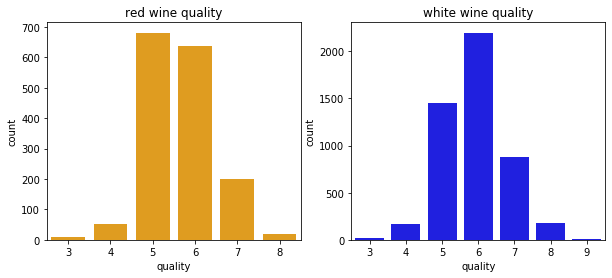

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(x='quality', data=red_data, color = "orange")
#sns.distplot(red_data['quality'],color = "orange",kde=True)
plt.title('red wine quality')
plt.subplot(122)
sns.countplot(x='quality', data=white_data, color = "blue")
plt.title('white wine quality')



- Most frequent quality levels of red wines are 5 and 6. 

- The  white wine has quality = 9 however, the highest quality of red wine is only 8.

- The shape of red wine and white wine is slightly different since the red wine's shape look like left-skewed and the white wine's shaple is more like symmetric.


### outlier analysis

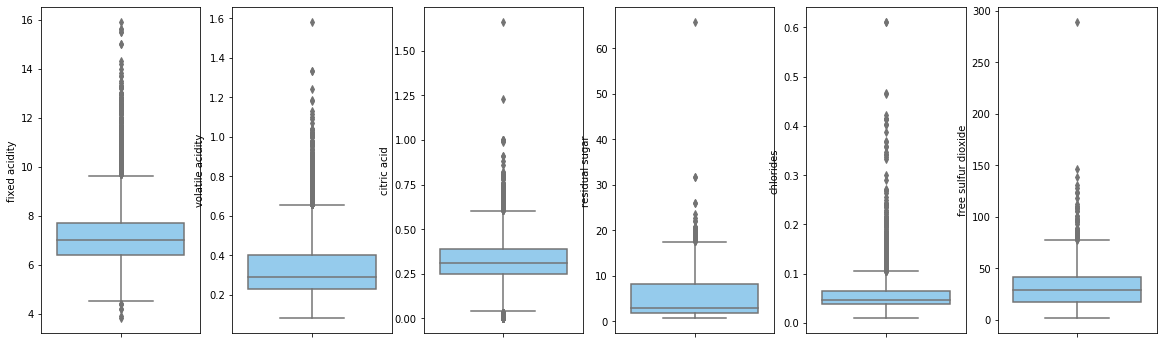

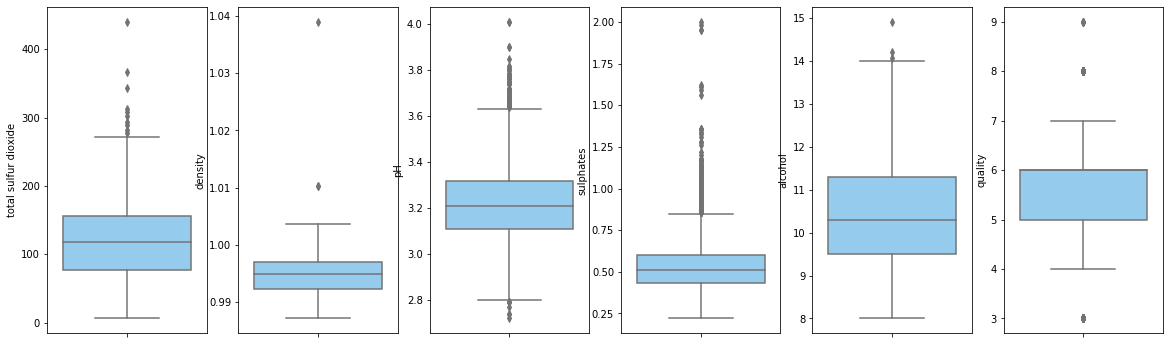

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(161)
sns.boxplot(x='fixed acidity', data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(162)
sns.boxplot(x='volatile acidity', data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(163)
sns.boxplot(x='citric acid', data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(164)
sns.boxplot(x='residual sugar', data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(165)
sns.boxplot(x='chlorides', data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(166)
sns.boxplot(x='free sulfur dioxide', data=wine_data,orient= "v",color = 'lightskyblue')

plt.figure(figsize=(20,6))
plt.subplot(161)
sns.boxplot(x='total sulfur dioxide', data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(162)
sns.boxplot(x='density', data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(163)
sns.boxplot(x='pH',data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(164)
sns.boxplot(x='sulphates', data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(165)
sns.boxplot(x='alcohol', data=wine_data,orient= "v",color = 'lightskyblue')
plt.subplot(166)

sns.boxplot(x='quality', data=wine_data,orient= "v",color = 'lightskyblue')


An outlier is an element of a data set that distinctly stands out from the rest of the data. Here we draw the boxplot for all variables to detect outliers.

**Observations regarding variables:**

1.  All variables have outliers

2.  For the variable "Residual sugar" it has positively skewed distribution


**2. correlation heatmap**

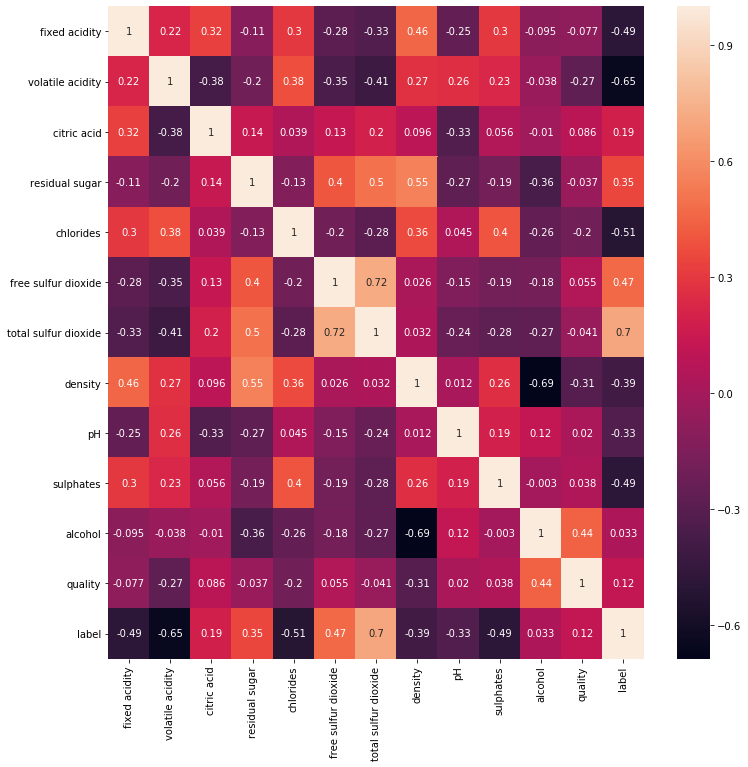

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(wine_data.corr(),color = 'c', annot=True)

The correlation heatmap is used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related.

From the plot below we know: 

•	Strong relations: (1>r>0.6 or-1<r <-0.6)

-	Density ~ alcohol 

-	Total sulfur dioxide ~ label

-	Label ~ volatile acidity

-	Free sulfur dioxide ~ total sulfur dioxide


•	Moderate relations: (0.6>r >0.45  or -0.6<r<-0.45)

-	Density ~residual sugar

-	Residual sugar ~ total sulfur dioxide

-	Fixed acidity ~ density

-	label ~ chlorides

-	label ~ free sulfur dioxide

-   label ~ fixed acidity

-	label ~ sulphates


**3. boxplot**

From the correlation plot we know that the correlation between the label and "volatile acidity","chlorides","fixed acidity","sulphates" are the highest for which means the distribution between red and white wine might be significant different.

So below we use boxplot to further explore the relationship.

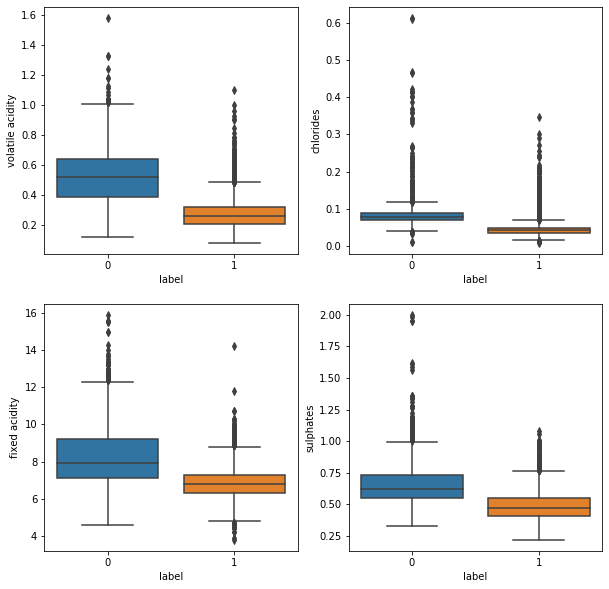

In [22]:

plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(x="label", y="volatile acidity",data=wine_data)


plt.subplot(222)
sns.boxplot(x="label",y= "chlorides",data=wine_data)

plt.subplot(223)
sns.boxplot(x="label",y= "fixed acidity",data=wine_data)


plt.subplot(224)
sns.boxplot(x="label",y= "sulphates",data=wine_data)

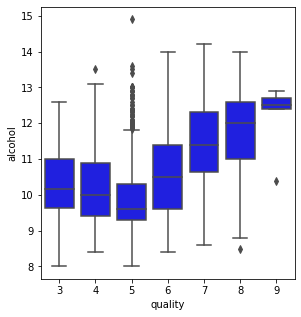

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(x= 'quality' , y='alcohol', data=wine_data,color ="blue")
#plt.subplot(122)
#sns.boxplot(x= 'quality' , y='density', data=wine_data,color ="lightskyblue")

- When the quality increases, the alcohol first decreases then increases.

- When the quality increases, the density decreases. 

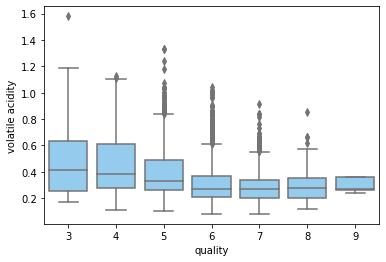

In [49]:
sns.boxplot(x= 'quality' , y='volatile acidity', data=wine_data,color ="lightskyblue")